In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_df.csv')
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,5,male,58.0,USA,25.80,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1604,0,male,68.0,USA,28.75,0.000000,0.090909,0.000000,0.000000,0.000000,...,0.0,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1605,5,female,59.0,USA,23.66,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,5,female,56.0,USA,43.85,0.000000,0.125000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df = df[(df['Condition'] != 3) & (df['Condition'] != 4) & 
        (df['Condition'] != 5) & (df['Condition'] != 6) & 
        (df['Condition'] != 7) & (df['Condition'] != 8)]

In [4]:
df

,Condition,Sex,Age,Country,BMI,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,United States of America,21.22,0.062933,0.588542,0.010329,0.025237,0.006070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,United Kingdom,28.70,0.086461,0.457608,0.033337,0.018467,0.004317,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,Austria,30.90,0.086534,0.066497,0.026914,0.069686,0.082436,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,United States of America,22.15,0.138701,0.333954,0.014312,0.021643,0.004422,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,United States of America,20.80,0.161436,0.379339,0.113208,0.075742,0.002161,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,USA,23.71,0.000000,0.000000,0.000000,0.500000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,USA,25.11,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,USA,24.13,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,USA,29.05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df.drop(['Country', 'BMI'], axis=1)

In [6]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Phocaeicola,Paraprevotella,Tidjanibacter,Flavonifractor,Mediterraneibacter,Agathobacter,Ligilactobacillus,Anaerobutyricum,Escherichia,Collinsella
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df = df.loc[:, (df != 0).any(axis=0)]

In [8]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,male,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,male,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,male,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,male,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,male,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,male,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,male,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,male,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,female,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [9]:
df['Condition'].unique()

array([0, 1, 2])

In [10]:
df_label_string = df['Condition'].unique()

In [11]:
df['Sex'] = df['Sex'].map({'male': 1, 'female':0})

/var/folders/gw/6zvc4vx95yx8vrymkvc5m8zm0000gn/T/ipykernel_29578/3851909954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 1, 'female':0})


In [12]:
df

,Condition,Sex,Age,Alistipes,Bacteroides,Bifidobacterium,Blautia,Clostridium,Dorea,Eubacterium,...,Oscillospira,Subdoligranulum,Sutterella,Anaerostipes,Streptococcus,Prevotella,Ruminiclostridium,Phocaeicola,Paraprevotella,Tidjanibacter
0,0,1,0.0,0.062933,0.588542,0.010329,0.025237,0.006070,0.001171,0.015014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,1,62.0,0.086461,0.457608,0.033337,0.018467,0.004317,0.001799,0.041012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,63.0,0.086534,0.066497,0.026914,0.069686,0.082436,0.043823,0.257714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,67.0,0.138701,0.333954,0.014312,0.021643,0.004422,0.000233,0.005934,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0,1,27.0,0.161436,0.379339,0.113208,0.075742,0.002161,0.004188,0.030981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,0,1,32.0,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1590,0,1,69.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1592,0,1,73.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1598,0,0,32.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [13]:
y = df['Condition']
X = df.drop(['Condition'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [15]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [16]:
params = {'eta': [0.1, 0.3, 0.8],
         'objective': ['reg:squarederror', 'logistic']}

In [17]:
grid_search = GridSearchCV(XGBClassifier(), params, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'eta': 0.1, 'objective': 'reg:squarederror'}


In [18]:
best_params = {'eta': 0.1}

In [19]:
evallist = [(dtrain, 'train'), (dtest, 'eval')]
num_round = 10
bst = xgb.train(best_params, dtrain, num_round, evallist)

[0]	train-rmse:0.68601	eval-rmse:0.64079
[1]	train-rmse:0.61981	eval-rmse:0.59261
[2]	train-rmse:0.56009	eval-rmse:0.55162
[3]	train-rmse:0.50621	eval-rmse:0.51722
[4]	train-rmse:0.45760	eval-rmse:0.48880
[5]	train-rmse:0.41375	eval-rmse:0.46576
[6]	train-rmse:0.37418	eval-rmse:0.44748
[7]	train-rmse:0.33848	eval-rmse:0.43337
[8]	train-rmse:0.30626	eval-rmse:0.42284
[9]	train-rmse:0.27718	eval-rmse:0.41533


/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/xgboost/core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


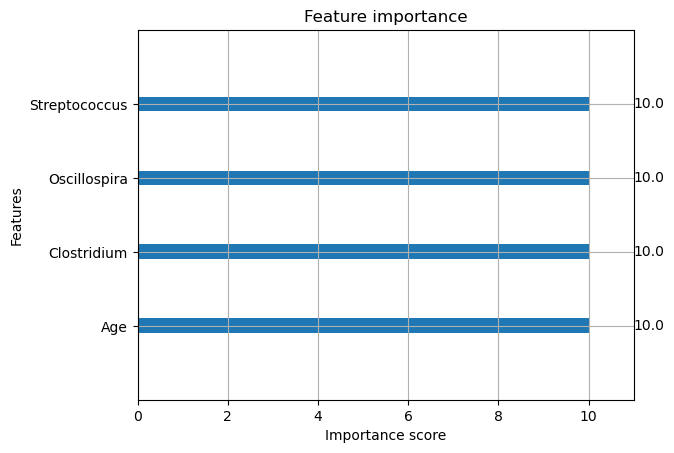

In [20]:
ypred = bst.predict(dtest)

xgb.plot_importance(bst, max_num_features=50)
#plt.savefig('xgb_neuro_feature_importance.jpg')
plt.show()

In [21]:
plt.figure(figsize=(10, 8))
xgb.to_graphviz(bst, tree_idx=2)
plt.savefig('xgb_neuro_tree.jpg')

<Figure size 1000x800 with 0 Axes>

In [22]:
xgb = XGBClassifier(eta=0.8, probability=True, random_state=23)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
#y_pred

/Users/melinakopischkie/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [07:12:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "probability" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
y_test_array = np.array(y_test)
#y_test_array

In [24]:
accuracy = accuracy_score(y_test, y_pred)
np.round(accuracy, decimals=4)

0.9688

In [25]:
report = classification_report(y_test, y_pred, target_names=df_label_string, output_dict=True)
report_df = pd.DataFrame(report).T
report_df

,precision,recall,f1-score,support
0,0.977273,0.977273,0.977273,44.00000
1,1.000000,1.000000,1.000000,13.00000
2,0.857143,0.857143,0.857143,7.00000
accuracy,0.968750,0.968750,0.968750,0.96875
macro avg,0.944805,0.944805,0.944805,64.00000
weighted avg,0.968750,0.968750,0.968750,64.00000


In [26]:
y_prob = xgb.predict_proba(X_test)
y_prob[1]

array([0.98815656, 0.00502432, 0.00681912], dtype=float32)

In [27]:
y_test_bin = label_binarize(y_test_array, classes=np.arange(3))  # Shape: (num_samples, 8)
y_test_bin[1]

array([1, 0, 0])

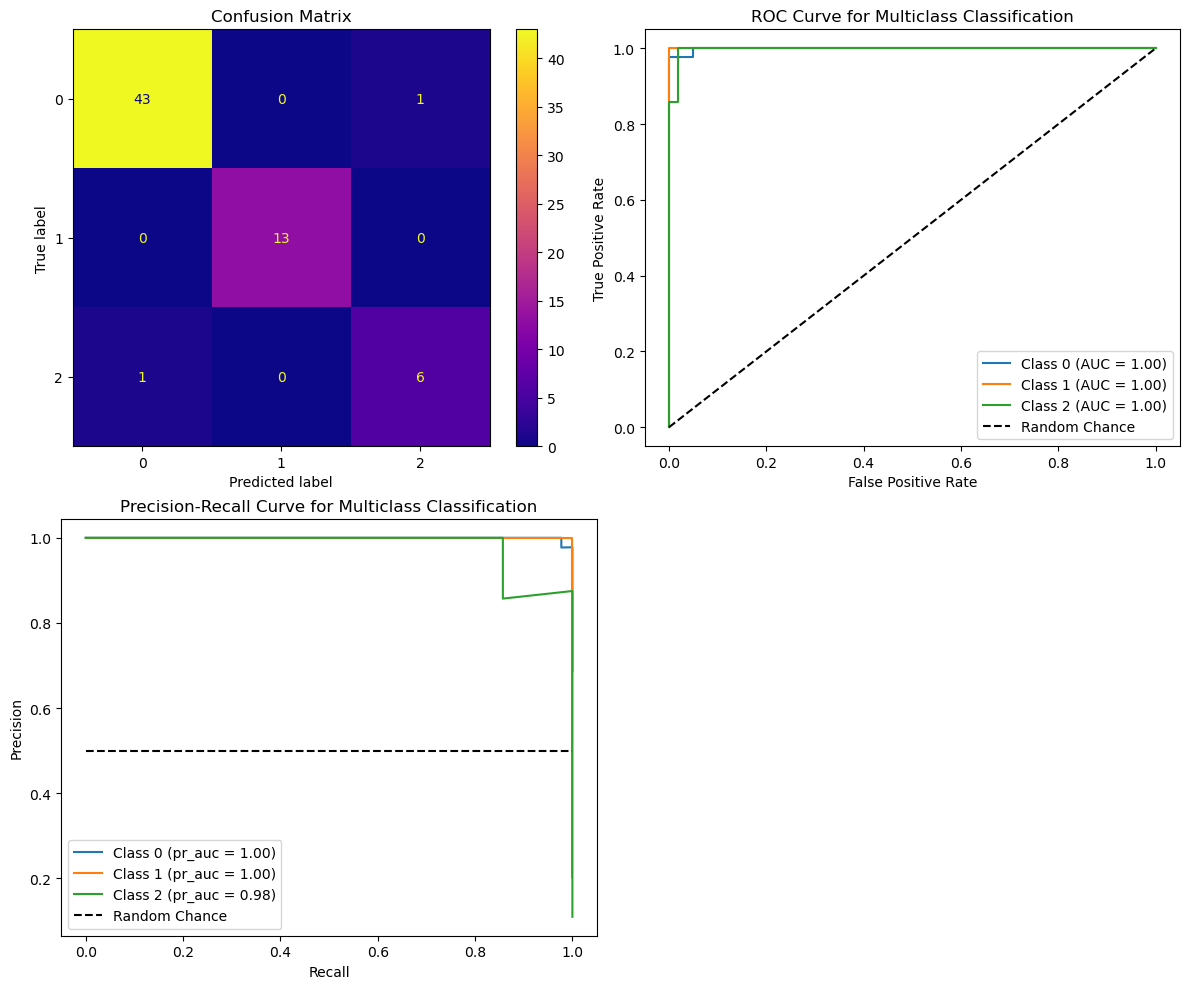

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='plasma', ax=axs[0, 0])  # Top-left subplot
axs[0, 0].set_title('Confusion Matrix')

# roc curve
for i in range(3): 
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    axs[0, 1].plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

axs[0, 1].plot([0, 1], [0, 1], 'k--', label='Random Chance')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve for Multiclass Classification')
axs[0, 1].legend()

# precision-recall curve
for i in range(3): 
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    pr_auc = auc(recall, precision)
    axs[1, 0].plot(recall, precision, label=f'Class {i} (pr_auc = {pr_auc:.2f})')

axs[1, 0].plot([0, 1], [0.5, 0.5], 'k--', label='Random Chance')
axs[1, 0].set_xlabel('Recall')
axs[1, 0].set_ylabel('Precision')
axs[1, 0].set_title('Precision-Recall Curve for Multiclass Classification')
axs[1, 0].legend()

axs[1, 1].axis('off')

plt.tight_layout()
#plt.savefig('xbg_neuro_graphs.jpg')
plt.show()
